Reference: [Ultralytics YoloV5 github repository](https://github.com/ultralytics/yolov5)

# Imports

In [1]:
import os
import glob as glob
import matplotlib.pyplot as plt
import cv2
import requests #to download some data from internet
import random
import numpy as np

SEED = 42
np.random.seed(SEED)

In [2]:
!ls
!pwd

dataset_ss22_inference
dataset_ss22_inference.zip
dataset_ss22_v4
dataset_ss22_v4.yaml
dataset_ss22_v4.zip
day3_test_images
day3_test_images.zip
inference_heartmet_set_2
inference_heartmet_set_2.zip
inference_images
inference_images.zip
LICENSE
object_recognition_YOLOv5_heartmet.ipynb
object_recognition_YOLOv5.ipynb
object_recognition_YOLOv5_ss22_local_competition.ipynb
README.md
yolov5
/home/jovyan/public/b_it_bot_work/2d_perception_test


## Prepare the Dataset


Dataset for Summer 2022 competition Source: [HBRS Bib cloud](https://bib-cloud.bib.hochschule-bonn-rhein-sieg.de/apps/files/?dir=/Shared/b-it-bots-ds/atwork/images/object_detection/YOLO/internal_robocup_2022/FULL_DATASET_SS22_COMPETITION&fileid=14231157)

The dataset is structured in the following manner:

```
├── dataset_ss22_v4.yaml
├── README.md
├── dataset_ss22_v4
        train
        ├── images
        └── labels
        valid
        ├── images
        └── labels

```

### The Dataset YAML File

The dataset YAML (`dataset_ss22_v4.yaml`) file containing the path to the training and validation images and labels. This file will also contain the class names from the dataset.

The dataset contains 20 classes.

The following block shows the contents of the `dataset_ss22_v4.yaml` file.

```yaml
train: ../dataset_ss22_v4/train/images
val: ../dataset_ss22_v4/valid/images

nc: 20

names: ['F20_20_B', 'R20', 'S40_40_B', 'S40_40_G', 'axis', 'bearing_box', 'bracket', 'brown_box', 'cup', 'dishwasher_soap', 'eye_glasses', 'insulation_tape', 'motor', 'pringles', 'screw_driver', 'sponge', 'spoon', 'tennis_ball', 'toothbrush', 'towel']
```

### Visualize a Few Ground Truth Images

In YOLO format, [x_center, y_center, width, height]


```
A------------------------
-------------------------
-------------------------
-------------------------
-------------------------
------------------------B
```

In Bounding Box format, A [x_min, y_min] and B [x_max, y_max].


Visualize 4 random samples from Dataset

[Reference](https://www.youtube.com/watch?v=Ciy1J97dbY0&ab_channel=LearnOpenCV)

In [3]:
class_names = ['F20_20_B', 'R20', 'S40_40_B', 'S40_40_G', 'axis', 'bearing_box', 'bracket', 'brown_box', 'cup', 
               'dishwasher_soap', 'eye_glasses', 'insulation_tape', 'motor', 'pringles', 'screw_driver', 'sponge', 
               'spoon', 'tennis_ball', 'toothbrush', 'towel']
colors = np.random.uniform(0, 255, size=(len(class_names), 3))

In [4]:
# Function to convert bounding boxes in YOLO format to xmin, ymin, xmax, ymax.
def yolo2bbox(bboxes):
    xmin, ymin = bboxes[0]-bboxes[2]/2, bboxes[1]-bboxes[3]/2
    xmax, ymax = bboxes[0]+bboxes[2]/2, bboxes[1]+bboxes[3]/2
    return xmin, ymin, xmax, ymax

In [5]:
def plot_box(image, bboxes, labels):
    # Need the image height and width to denormalize
    # the bounding box coordinates
    h, w, _ = image.shape
    for box_num, box in enumerate(bboxes):
        x1, y1, x2, y2 = yolo2bbox(box)
        # denormalize the coordinates
        xmin = int(x1*w)
        ymin = int(y1*h)
        xmax = int(x2*w)
        ymax = int(y2*h)
        width = xmax - xmin
        height = ymax - ymin

        class_name = class_names[int(labels[box_num])]

        cv2.rectangle(
            image,
            (xmin, ymin), (xmax, ymax),
            color=colors[class_names.index(class_name)],
            thickness=2
        )

        font_scale = min(1, max(3, int(w/500)))
        font_thickness = min(2, max(10, int(w/50)))

        p1, p2 = (int(xmin), int(ymin)), (int(xmax), int(ymax))
        # Text width and height
        tw, th = cv2.getTextSize(
            class_name,
            0, fontScale=font_scale, thickness=font_thickness
        )[0]
        p2 = p1[0] + tw, p1[1] + -th - 10
        cv2.rectangle(
            image,
            p1, p2,
            color=colors[class_names.index(class_name)],
            thickness=-1,
        )
        cv2.putText(
            image,
            class_name,
            (xmin+1, ymin-10),
            cv2.FONT_HERSHEY_SIMPLEX,
            font_scale,
            (255, 255, 255),
            font_thickness
        )
    return image

In [6]:
# Function to plot images with the bounding boxes.
def plot(image_paths, label_paths, num_samples):
    all_training_images = glob.glob(image_paths)
    all_training_labels = glob.glob(label_paths)
    all_training_images.sort()
    all_training_labels.sort()

    num_images = len(all_training_images)

    plt.figure(figsize=(15, 12))
    for i in range(num_samples):
        j = random.randint(0, num_images-1)
        # j = 0
        image = cv2.imread(all_training_images[j])
        with open(all_training_labels[j], 'r') as f:
            bboxes = []
            labels = []
            label_lines = f.readlines()
            for label_line in label_lines:
                label = label_line.split(' ')[0]
                bbox_string = label_line.split(' ')[1:]
                x_c, y_c, w, h = bbox_string
                x_c = float(x_c)
                y_c = float(y_c)
                w = float(w)
                h = float(h.split('\n')[0])
                bboxes.append([x_c, y_c, w, h])
                labels.append(label)
        result_image = plot_box(image, bboxes, labels)
        plt.subplot(2, 2, i+1)
        plt.imshow(result_image[:, :, ::-1])
        plt.axis('off')
    plt.subplots_adjust(wspace=0)
    plt.tight_layout()
    plt.show()


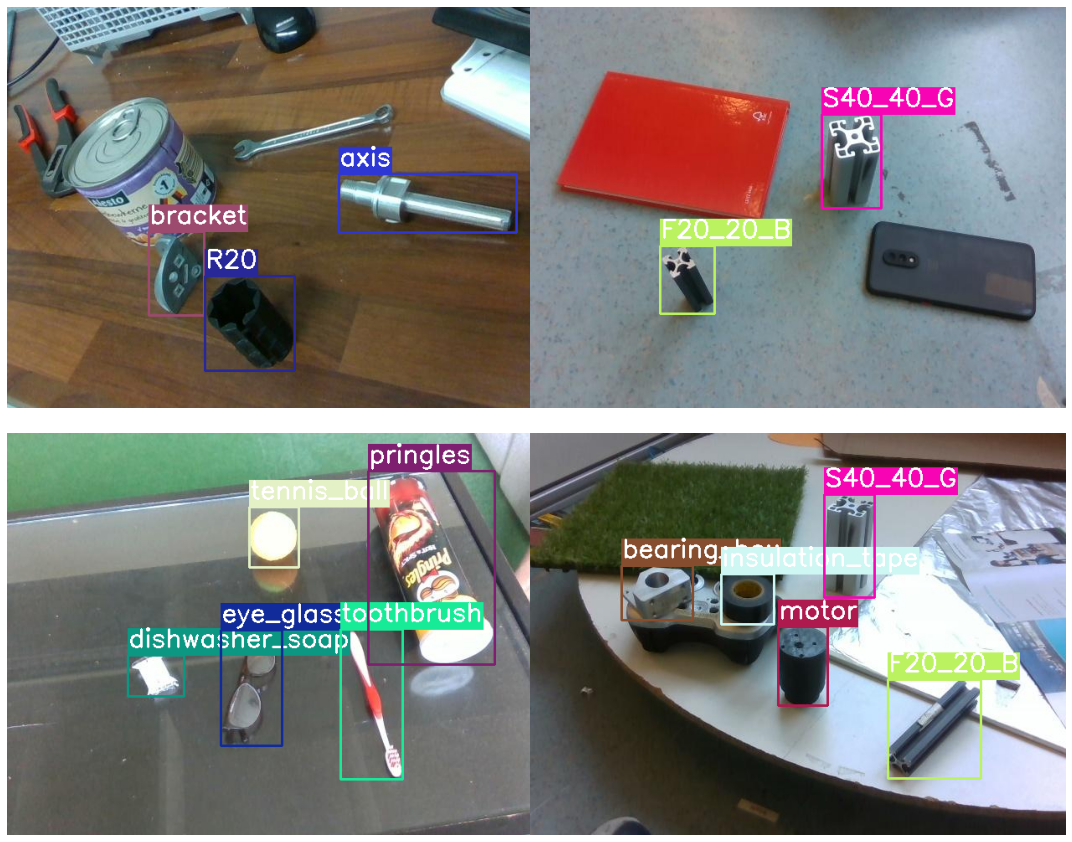

In [7]:
# Visualize a few training images.
plot(
    image_paths='dataset_ss22_v4/train/images/*', 
    label_paths='dataset_ss22_v4/train/labels/*',
    num_samples=4,
)

# plot(
#     image_paths='dataset_ss22_inference/train/images/*', 
#     label_paths='dataset_ss22_inference/train/labels/*',
#     num_samples=4,
# )

## Helper Functions for Logging

The helper functions are for logging of the results in the notebook while training the models.


In [8]:
def set_res_dir():
    # Directory to store results
    #res_dir_count = len(glob.glob('runs/train/*'))
    res_dir_count = len(glob.glob('/home/jovyan/public/logs/yolo5/train/*'))
    print(f"Current number of result directories: {res_dir_count}")
    if TRAIN:
        RES_DIR = f"/home/jovyan/public/logs/yolo5/train/results_{res_dir_count+1}"
        print(RES_DIR)
    else:
        RES_DIR = f"/home/jovyan/public/logs/yolo5/train/results_{res_dir_count}"
    return RES_DIR

## Clone YOLOV5 Repository

In [9]:
if not os.path.exists('yolov5'):
    !git clone https://github.com/ultralytics/yolov5.git

In [10]:
# Change to yoloV5 directory
%cd yolov5

/home/jovyan/public/b_it_bot_work/2d_perception_test/yolov5


## **Function to Monitor TensorBoard logs**

**NOTE**: TensorBoard logs can be visualized with [Local port link](http://10.20.118.78:31025/#scalars&runSelectionState=eyJ5b2xvNS90cmFpbi9yZXN1bHRzXzEiOmZhbHNlLCJ5b2xvNS90cmFpbi9yZXN1bHRzXzIiOmZhbHNlLCJ5b2xvNS90cmFpbi9yZXN1bHRzXzMiOmZhbHNlLCJ5b2xvNS90cmFpbi9yZXN1bHRzXzQiOmZhbHNlLCJ5b2xvNS90cmFpbi9yZXN1bHRzXzUiOmZhbHNlLCJ5b2xvNS90cmFpbi9yZXN1bHRzXzgiOmZhbHNlLCJ5b2xvNS90cmFpbi9yZXN1bHRzXzgyIjpmYWxzZSwieW9sbzUvdHJhaW4vcmVzdWx0c18xNCI6ZmFsc2UsInlvbG81L3RyYWluL3Jlc3VsdHNfMTMiOmZhbHNlLCJ5b2xvNS90cmFpbi9yZXN1bHRzXzEyIjpmYWxzZSwieW9sbzUvdHJhaW4vcmVzdWx0c18xMSI6ZmFsc2V9)


## Training using YOLOV5

In [11]:
TRAIN = True
FREEZE = True # freezing first 15 layers
EPOCHS = 2

##### If already trained model (.pt file) is available, then give that model path in `--weights` argument
Note: User configurable arguments
- batch size
- data yaml path
- pre-trained weight file
- image size
- epochs
- result directory
- freeze layers

In [12]:

if TRAIN:   
    if FREEZE:
        RES_DIR = set_res_dir()
    
        # training by freezing first 15 layers out of 25 layers       
#         !python train.py \
#                 --batch 256 \
#                 --data ../dataset_ss22.yaml \
#                 --weights yolov5m.pt \
#                 --img 640 \
#                 --epochs {EPOCHS} \
#                 --name {RES_DIR} \
#                 --freeze 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
        
        # trainig on multi GPUs
        !python -m torch.distributed.run --nproc_per_node 2 train.py \
                --batch 512 \
                --data ../dataset_ss22_v4.yaml \
                --weights yolov5m.pt \
                --img 640 \
                --epochs {EPOCHS} \
                --name {RES_DIR} \
                --device 0,1 \
                --freeze 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
        
        
    
#         # trainig using pretrained model (multi GPUs)
#         !python -m torch.distributed.run --nproc_per_node 2 train.py \
#                 --batch 512 \
#                 --data ../dataset_ss22_v3.yaml \
#                 --resume /home/jovyan/public/logs/yolo5/train/results_22/weights/best.pt \
#                 --img 640 \
#                 --epochs {EPOCHS} \
#                 --name {RES_DIR} \
#                 --device 0,1 \
#                 --freeze 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
    
    else:
        RES_DIR = set_res_dir()
        # training all layers of model
        !python train.py --data ../dataset_ss22_v2.yaml --weights yolov5m.pt \
        --img 640 --epochs {EPOCHS} --batch-size 256 --name {RES_DIR}
else:
    # set the RES_DIR name
    res_dir_count = '19' 
    RES_DIR = f"/home/jovyan/public/logs/yolo5/train/results_{res_dir_count}"
    print("Set RES_DIR to: ", RES_DIR)


Current number of result directories: 47
/home/jovyan/public/logs/yolo5/train/results_48
*****************************************
Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
*****************************************
train: weights=yolov5m.pt, cfg=, data=../dataset_ss22_v4.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=2, batch_size=512, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0,1, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=/home/jovyan/public/logs/yolo5/train/results_48, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], save_period=-1, seed=0, local_rank=-1,

train: Scanning '/home/jovyan/public/b_it_bot_work/2d_perception_test/dataset_ss
train: New cache created: /home/jovyan/public/b_it_bot_work/2d_perception_test/dataset_ss22_v4/train/labels.cache
val: Scanning '/home/jovyan/public/b_it_bot_work/2d_perception_test/dataset_ss22
val: New cache created: /home/jovyan/public/b_it_bot_work/2d_perception_test/dataset_ss22_v4/valid/labels.cache

AutoAnchor: 5.48 anchors/target, 1.000 Best Possible Recall (BPR). Current anchors are a good fit to dataset ✅
Plotting labels to /home/jovyan/public/logs/yolo5/train/results_48/labels.jpg... 
Image sizes 640 train, 640 val
Using 16 dataloader workers
Logging results to /home/jovyan/public/logs/yolo5/train/results_48
Starting training for 2 epochs...

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
        0/1      22.1G      0.118    0.05252    0.08134       1870        640:  Reducer buckets have been rebuilt in this iteration.
        0/1      20.6G     0.1182    0.05368  

## Check Out the Validation Predictions and Inference

### Visualization and Inference Utilities

In [13]:
# Function to show validation predictions saved during training.
def show_valid_results(RES_DIR):
    !ls {RES_DIR}
    EXP_PATH = f"{RES_DIR}"
    validation_pred_images = glob.glob(f"{EXP_PATH}/*_pred.jpg")
    print(validation_pred_images)
    for pred_image in validation_pred_images:
        image = cv2.imread(pred_image)
        plt.figure(figsize=(19, 16))
        plt.imshow(image[:, :, ::-1])
        plt.axis('off')
        plt.show()

The following functions are for carrying out inference on images and videos.

In [14]:
# Helper function for inference on images.
def inference(RES_DIR, data_path):
    # Directory to store inference results.
    infer_dir_count = len(glob.glob('/home/jovyan/public/logs/yolo5/detect/*'))
    print(f"Current number of inference detection directories: {infer_dir_count}")
    INFER_DIR = f"/home/jovyan/public/logs/yolo5/detect/inference_{infer_dir_count+1}"
    print(INFER_DIR)
    # Inference on images.
    !python detect.py --weights {RES_DIR}/weights/best.pt \
    --source {data_path} --name {INFER_DIR} --device 1
    return INFER_DIR

In [22]:
def visualize(INFER_DIR):
# Visualize inference images.
    INFER_PATH = f"{INFER_DIR}"
    infer_images = glob.glob(f"{INFER_PATH}/*")
    print(infer_images)
    for pred_image in infer_images:
        image = cv2.imread(pred_image)
        plt.figure(figsize=(19, 16))
        plt.imshow(image[:, :, ::-1])
        plt.axis('off')
        plt.show()

**Visualize validation prediction images.**

confusion_matrix.png					R_curve.png
events.out.tfevents.1668012414.jupyter-kpatel2s.2205.0	results.csv
F1_curve.png						results.png
hyp.yaml						train_batch0.jpg
labels_correlogram.jpg					train_batch1.jpg
labels.jpg						train_batch2.jpg
opt.yaml						val_batch0_labels.jpg
P_curve.png						val_batch0_pred.jpg
PR_curve.png						weights
['/home/jovyan/public/logs/yolo5/train/results_48/val_batch0_pred.jpg']


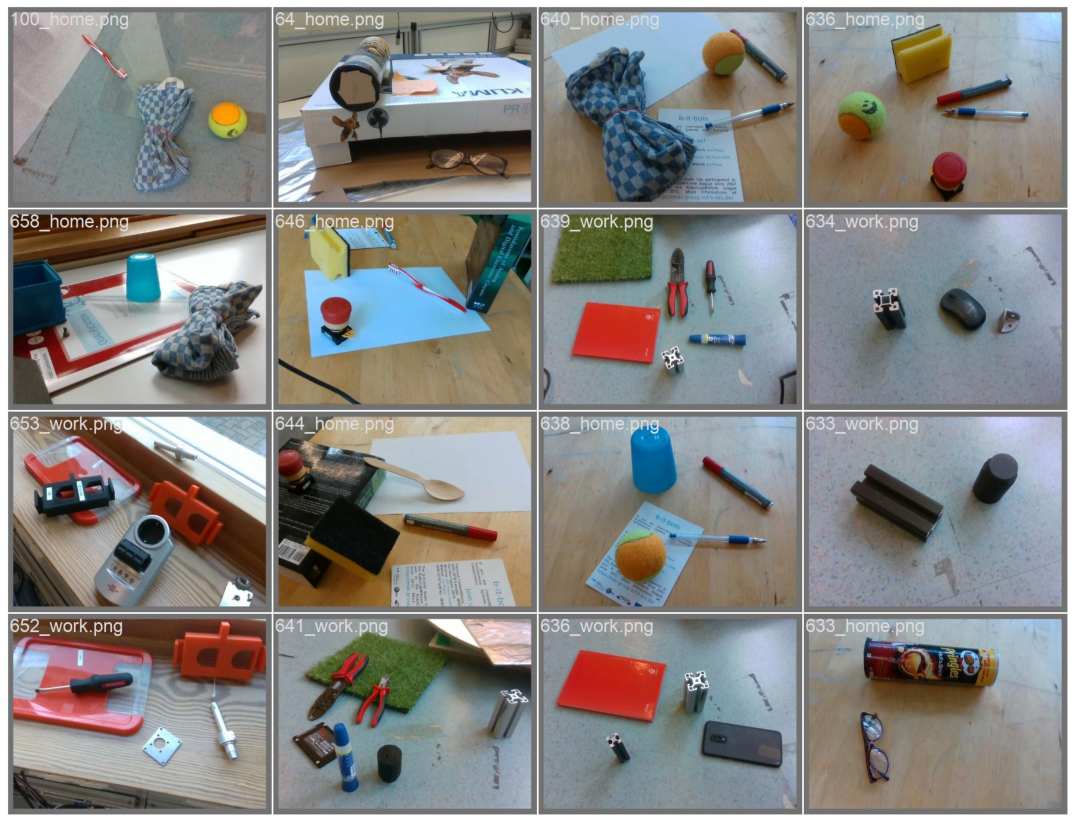

In [16]:
show_valid_results(RES_DIR)

### Inference
In this section, we will carry out inference on unseen images and videos from the internet. 

The images for inference are in the `inference_images` directory.

**To carry out inference on images, we just need to provide the directory path where all the images are stored, and inference will happen on all images automatically.**

In [17]:
on_single_image = True

if on_single_image:
    # Inference on single image
    IMAGE_INFER_DIR = inference(RES_DIR, '/home/jovyan/public/b_it_bot_work/2d_perception_test/inference_images/inference_img01/1562121558.622500193_raw_rgb.jpg')
else:
    # Inference on images.
    IMAGE_INFER_DIR = inference(RES_DIR, '/home/jovyan/public/b_it_bot_work/2d_perception/day3_test_images')


IMAGE_INFER_DIR

Current number of inference detection directories: 27
/home/jovyan/public/logs/yolo5/detect/inference_28
detect: weights=['/home/jovyan/public/logs/yolo5/train/results_48/weights/best.pt'], source=/home/jovyan/public/b_it_bot_work/2d_perception_test/inference_images/inference_img01/1562121558.622500193_raw_rgb.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=1, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=/home/jovyan/public/logs/yolo5/detect/inference_28, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 2022-11-9 Python-3.9.13 torch-1.11.0+cu113 CUDA:1 (NVIDIA GeForce RTX 3090, 24265MiB)

Fusing layers... 
Model summary: 212 layers, 20929713 parameters, 0 gradients, 48.1 GFLOPs
image 1/1 /home/jovyan/public/b_it_bot_work/2d_percep

'/home/jovyan/public/logs/yolo5/detect/inference_28'

['/home/jovyan/public/logs/yolo5/detect/inference_28/1562121558.622500193_raw_rgb.jpg']


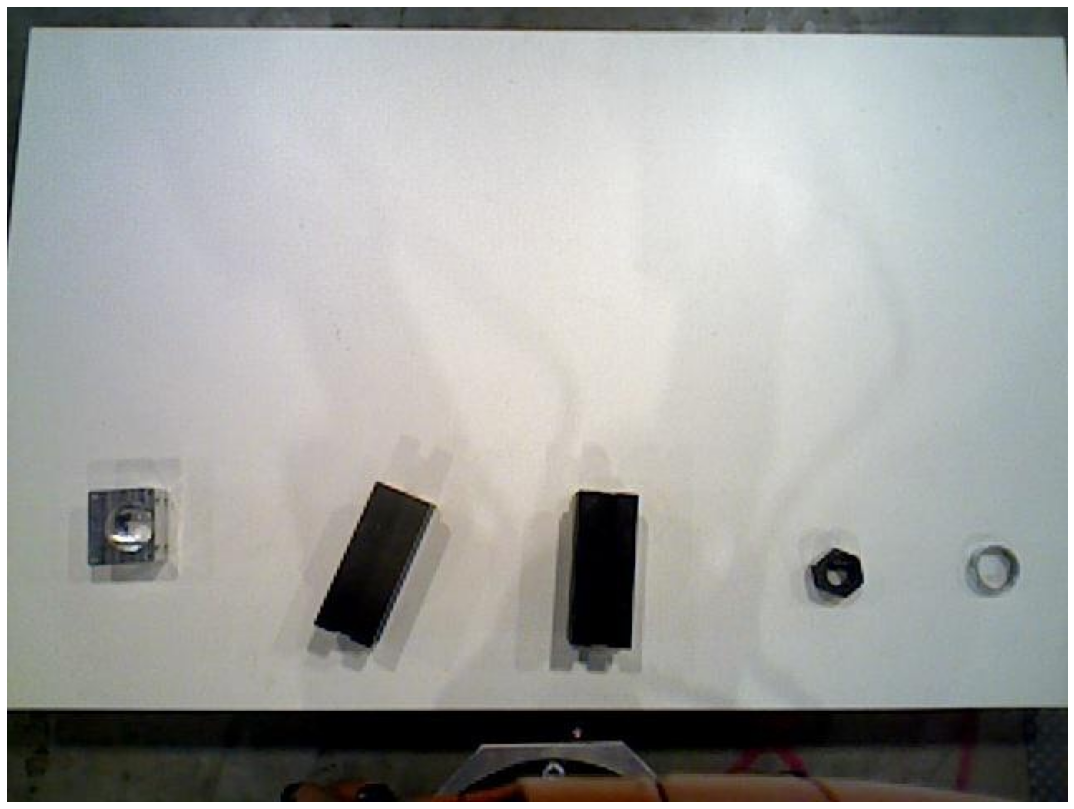

In [23]:
# IMAGE_INFER_DIR
visualize(IMAGE_INFER_DIR)

# Export model (.pt) to ONNX model (.onnx)
###### Reference: https://learnopencv.com/object-detection-using-yolov5-and-opencv-dnn-in-c-and-python/

In [ ]:
!python export.py --weights /home/jovyan/public/logs/yolo5/train/results_28/weights/best.pt --include onnx